## **# MET-MALE ASSIGNMENT 1**

**Q1)**Process of Partitioning Data: KMeans partitions data into k clusters by assigning each data point to the cluster whose centroid is closest. After assigning data points, the centroids are updated by calculating the mean of all points in each cluster. This process repeats until convergence, where the centroids no longer change.
Minimizing WCSS: The objective of KMeans is to minimize the Within-Cluster Sum of Squares (WCSS), which is the sum of squared distances between each point and its respective centroid. This represents the compactness of the clusters. The algorithm minimizes WCSS by iteratively adjusting the centroids and reassigning data points.

**Q2)** KMeans++ improves the initialization of centroids by selecting the first centroid randomly, and then choosing subsequent centroids with a probability proportional to their distance squared from the nearest existing centroid. This ensures that centroids are well spread out, reducing the likelihood of poor clustering results that may occur with random initialization.

**Q3)** WCSS: Measures the compactness of clusters by calculating the sum of squared distances between points and their respective centroids.
Silhouette Score: A metric that combines both cohesion (how close points are within a cluster) and separation (how far apart the clusters are). Scores range from -1 to 1, where 1 indicates good clustering.
Dunn Index: A measure of cluster separation. It is calculated as the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn index indicates better clustering.

**Q4)**

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from kmodes.kprototypes import KPrototypes
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Load the dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/ielbadisy/healthdatasets/master/ketapain.csv'
df = pd.read_csv(url)
print(df.head())

# Select numeric columns (you can adjust this if you know the specific numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Scale the numeric variables
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled data
print("\nScaled Data:")
print(df.head())


   patientID    sexe  age  av_dose level_dose  cum_dose  cum_days  perfusion  \
0       6317  female   35    0.700   low dose     269.5         5       24.0   
1       2517  female   76    0.700   low dose     269.5         5       24.0   
2       1023  female   18    0.075   low dose      63.0        12        4.0   
3       3002  female   50   74.000   low dose     222.0         3       24.0   
4       7702    male   46   74.000   low dose     222.0         3       24.0   

       cost      qaly        mode  
0   4689.95  0.329389     continu  
1   4689.95  0.690946     continu  
2  11165.30  0.317344  discontinu  
3   2829.20  0.048617     continu  
4   2829.20  0.634071     continu  

Scaled Data:
   patientID    sexe       age   av_dose level_dose  cum_dose  cum_days  \
0   1.546047  female -1.285983 -0.613731   low dose  0.460077  0.399186   
1   0.015396  female  2.153030 -0.613731   low dose  0.460077  0.399186   
2  -0.586391  female -2.711915 -0.630121   low dose -1.300497  3

**Q5)**

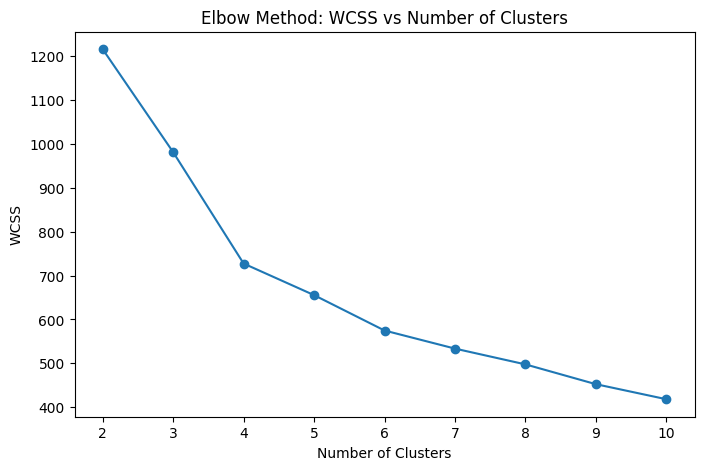

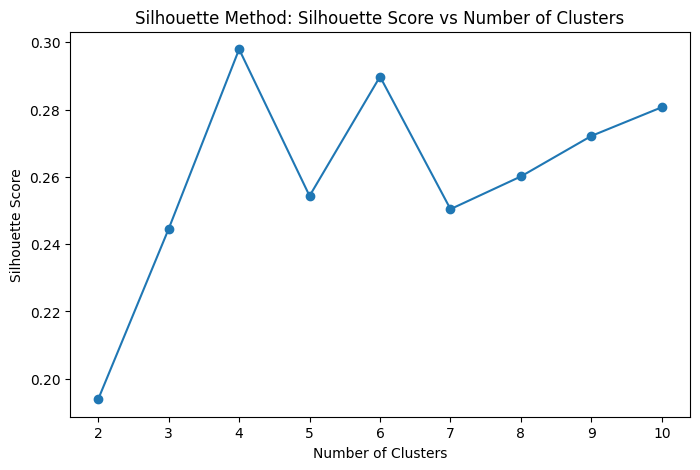

In [18]:
# Elbow Method: Plot WCSS
wcss = []
range_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_cols])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method: WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method: Plot Silhouette Score
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df[numeric_cols])
    silhouette_avg = silhouette_score(df[numeric_cols], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Both the Elbow Method and the Silhouette Method suggest that 4 clusters is the optimal number for the dataset.

The WCSS plot shows a noticeable "elbow" around 4 clusters. This suggests that 4 clusters might be the optimal choice, as the WCSS starts to flatten out after this point.

The silhouette score is highest at 4 clusters, as indicated by the peak at this point in the plot.


**Q6) and Q7)**

In [19]:
# Define the optimal number of clusters (from Q5)
optimal_clusters = 4

# KMeans clustering with random initialization
kmeans_random = KMeans(n_clusters=optimal_clusters, init='random', n_init=10, random_state=42)
kmeans_random.fit(df[numeric_cols])
clusters_random = kmeans_random.labels_


# KMeans clustering with KMeans++ initialization
kmeans_plus = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(df[numeric_cols])
clusters_plus = kmeans_plus.labels_

# Calculate silhouette scores
silhouette_random = silhouette_score(df[numeric_cols], clusters_random)
silhouette_plus = silhouette_score(df[numeric_cols], clusters_plus)

# Print the silhouette scores
print(f"Silhouette Score (Random Initialization): {silhouette_random:.3f}")
print(f"Silhouette Score (KMeans++ Initialization): {silhouette_plus:.3f}")

# Compare results
print("\nClustering comparison:")
print(f"WCSS (Random Initialization): {kmeans_random.inertia_:.2f}")
print(f"WCSS (KMeans++ Initialization): {kmeans_plus.inertia_:.2f}")

Silhouette Score (Random Initialization): 0.298
Silhouette Score (KMeans++ Initialization): 0.298

Clustering comparison:
WCSS (Random Initialization): 727.28
WCSS (KMeans++ Initialization): 727.28


Key Takeaways
At the Optimal k=4: Both initialization methods give identical results because the data clusters are well-separated and stable.
At Suboptimal k: The results diverge slightly when we change the number of clustersbecause the data is harder to partition correctly, and the initialization method plays a larger role in determining the clustering outcome.

**Q8)**

In [24]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df[numeric_cols])

print("KMeans Clustering Labels:")
print(kmeans_labels)

# Convert categorical columns to string format (required by KPrototypes)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype(str)

# Convert categorical column indices to a list of indices
categorical_indices = [df.columns.get_loc(col) for col in categorical_cols]

# KPrototypes Clustering
kproto = KPrototypes(n_clusters=4, random_state=42)
kproto_labels = kproto.fit_predict(df.values, categorical=categorical_indices)

print("KPrototypes Clustering Labels:")
print(kproto_labels)

# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(df[numeric_cols])

print("Agglomerative Clustering Labels:")
print(agglo_labels)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df[numeric_cols])

print("KMeans Clustering Labels:")
print(kmeans_labels)


# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df[numeric_cols])

print("GMM Clustering Labels:")
print(gmm_labels)


KMeans Clustering Labels:
[3 3 0 2 2 1 2 3 2 3 2 1 1 2 2 1 2 3 1 1 1 3 1 2 1 3 3 1 2 2 2 1 3 2 2 3 2
 3 2 1 1 1 0 2 3 3 2 1 2 0 1 1 3 1 1 1 1 3 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 2
 3 3 3 3 1 2 1 3 1 1 1 0 2 2 2 2 1 3 2 3 3 1 3 3 2 1 3 1 1 1 2 3 2 2 2 1 1
 0 3 3 2 3 3 2 3 3 1 3 1 2 3 3 3 3 0 3 3 3 1 3 1 1 3 1 3 3 3 3 1 2 1 0 3 3
 3 2 3 0 1 3 2 1 0 3 3 1 1 2 1 1 1 3 2 3 1 0 1 1 2 2 1 2 2 3 2 2 3 1 2 2]
KPrototypes Clustering Labels:
[3 3 1 0 0 2 0 3 0 3 0 2 2 0 0 2 0 3 2 2 2 3 2 0 2 3 3 2 0 0 0 2 3 0 0 3 0
 3 0 2 2 2 1 0 3 3 0 2 0 1 2 2 3 2 2 2 2 3 3 3 0 3 0 3 3 3 3 3 3 0 3 3 3 0
 3 3 3 3 2 0 2 3 2 2 2 1 0 0 0 0 2 3 0 3 3 2 3 3 0 2 3 2 2 2 0 3 0 0 0 2 2
 1 3 3 0 3 3 0 3 3 2 3 2 0 3 3 3 3 1 3 3 3 2 3 2 2 3 2 3 3 3 3 2 0 2 1 3 3
 3 0 3 1 2 3 0 2 1 3 3 2 2 0 2 2 2 3 0 3 2 1 2 2 0 0 2 0 0 3 0 0 3 2 0 0]
Agglomerative Clustering Labels:
[1 1 3 1 0 2 0 1 0 1 0 2 2 0 0 2 0 1 2 2 2 1 2 0 2 1 1 2 0 0 1 2 1 0 1 1 1
 1 0 2 2 2 3 0 1 1 0 2 1 3 2 1 1 2 2 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 2 0

**Q9)**

In [27]:
# Combine cluster labels from all algorithms into a single DataFrame
cluster_labels = pd.DataFrame({
    'KMeans': kmeans_labels,
    'KPrototypes': kproto_labels,
    'Agglomerative': agglo_labels,
    'GMM': gmm_labels
})

# Initialize the consensus matrix
n_samples = len(df)
consensus_matrix = np.zeros((n_samples, n_samples))

# Update the consensus matrix based on agreement across algorithms
for col in cluster_labels.columns:
    for i in range(n_samples):
        for j in range(n_samples):
            if cluster_labels[col][i] == cluster_labels[col][j]:
                consensus_matrix[i, j] += 1

# Normalize the consensus matrix
consensus_matrix /= len(cluster_labels.columns)

print("Consensus Matrix:")
print(consensus_matrix)

Consensus Matrix:
[[1.   1.   0.   ... 0.   0.25 0.25]
 [1.   1.   0.   ... 0.   0.25 0.25]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.25 0.25 0.   ... 0.   1.   1.  ]
 [0.25 0.25 0.   ... 0.   1.   1.  ]]


**Q10)**

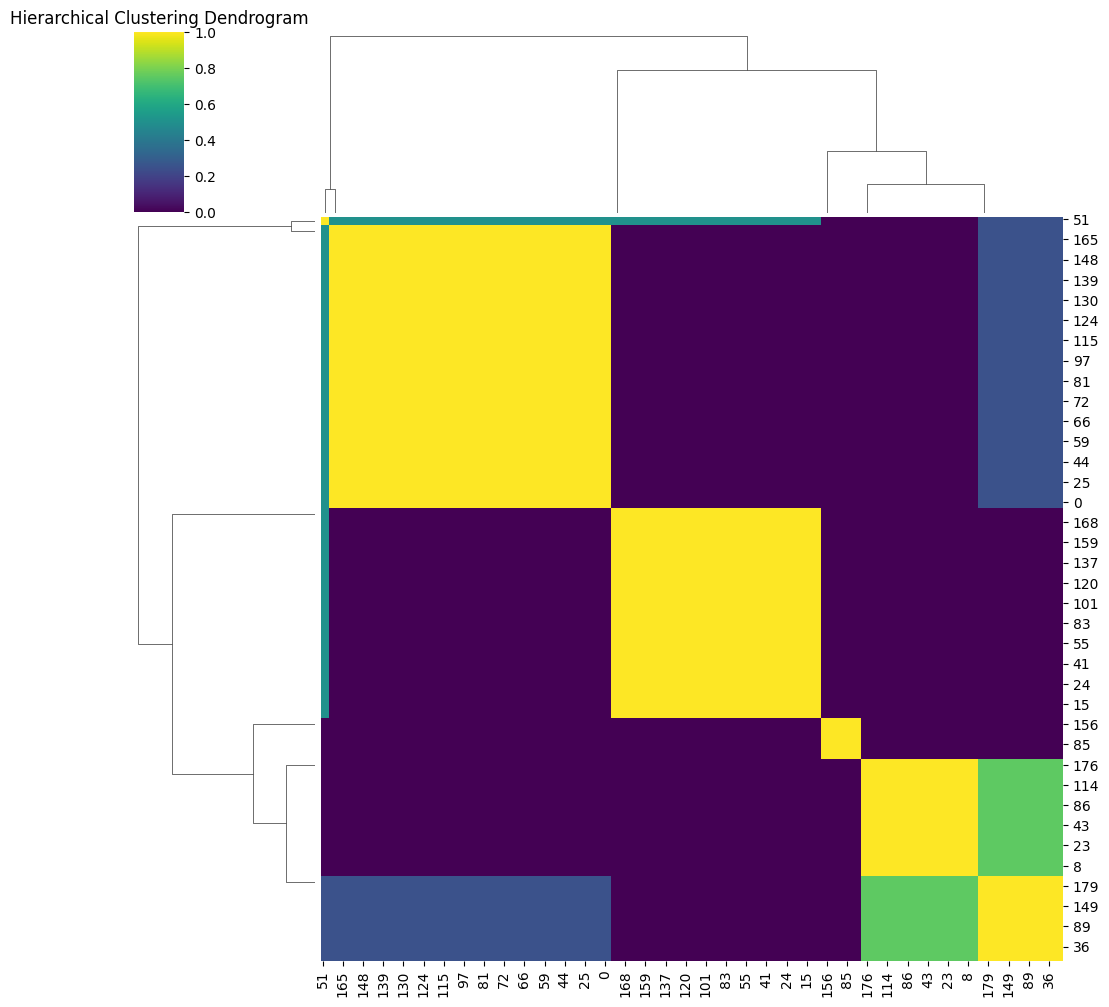

Meta-Clustering Labels:
[1 1 3 4 4 2 4 1 4 1 4 2 2 4 4 2 4 1 2 2 2 1 2 4 2 1 1 2 4 4 4 2 1 4 4 1 4
 1 4 2 2 2 3 4 1 1 4 2 4 3 2 1 1 2 2 2 2 1 1 1 4 1 4 1 1 1 1 1 1 4 1 1 1 4
 1 1 1 1 2 4 2 1 2 2 2 3 4 4 4 4 2 1 4 1 1 2 1 1 4 2 1 2 2 2 4 1 4 4 4 2 2
 3 1 1 4 1 1 4 1 1 2 1 2 4 1 1 1 1 3 1 1 1 2 1 2 2 1 2 1 1 1 1 2 4 2 3 1 1
 1 4 1 3 2 1 4 2 3 1 1 2 2 4 2 2 2 1 4 1 2 3 2 1 4 4 2 4 4 1 4 4 1 2 4 4]


In [29]:
# Apply hierarchical clustering to the consensus matrix
linkage_matrix = linkage(consensus_matrix, method='ward')
meta_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')  # Adjust t as needed for number of clusters

# Visualize the hierarchical clustering dendrogram
sns.clustermap(consensus_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix, cmap="viridis")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

print("Meta-Clustering Labels:")
print(meta_labels)


**Q11)**

In [32]:
# Adjusted Rand Index (ARI) for each algorithm
for col in cluster_labels.columns:
    ari = adjusted_rand_score(cluster_labels[col], meta_labels)
    print(f"ARI ({col} vs Meta-Clustering): {ari:.3f}")

# Silhouette Score for each algorithm
for col in cluster_labels.columns:
    silhouette = silhouette_score(df[numeric_cols], cluster_labels[col])
    print(f"Silhouette Score ({col}): {silhouette:.3f}")

# High-Consensus Pair Agreement
high_consensus_threshold = 0.8
high_consensus_agreement = (consensus_matrix >= high_consensus_threshold).sum() / (n_samples * (n_samples - 1))
print(f"High-Consensus Pair Agreement: {high_consensus_agreement:.3f}")

ARI (KMeans vs Meta-Clustering): 0.966
ARI (KPrototypes vs Meta-Clustering): 0.966
ARI (Agglomerative vs Meta-Clustering): 0.717
ARI (GMM vs Meta-Clustering): 1.000
Silhouette Score (KMeans): 0.298
Silhouette Score (KPrototypes): 0.298
Silhouette Score (Agglomerative): 0.271
Silhouette Score (GMM): 0.294
High-Consensus Pair Agreement: 0.267


**Q12)**

In [33]:
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Parameters for the simulation
n_datasets = 10  # Number of datasets to generate
n_samples = 300  # Number of samples per dataset
n_features = 2   # Number of features
n_clusters = 3   # True number of clusters

# Store ARI scores
ari_scores = {'KMeans': [], 'KPrototypes': [], 'Agglomerative': [], 'GMM': []}

for i in range(n_datasets):
    # Generate synthetic data
    X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=i)

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    ari_scores['KMeans'].append(adjusted_rand_score(y_true, kmeans_labels))

    # Apply Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X)
    ari_scores['Agglomerative'].append(adjusted_rand_score(y_true, agglo_labels))

    # Apply GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X)
    ari_scores['GMM'].append(adjusted_rand_score(y_true, gmm_labels))

    # Skip KPrototypes for synthetic data since it requires mixed types.

# Calculate average ARI for each algorithm
avg_ari = {alg: np.mean(scores) for alg, scores in ari_scores.items()}

print("Average ARI Scores:")
for alg, score in avg_ari.items():
    print(f"{alg}: {score:.3f}")


Average ARI Scores:
KMeans: 0.909
KPrototypes: nan
Agglomerative: 0.877
GMM: 0.904


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**Q13)**

In [ ]:
Q1